In [1]:
from pypsdm.models.input.container.participants import SystemParticipantsContainer
from pypsdm.models.result.container.participants import ParticipantsResultContainer
from pypsdm.models import gwr
from pypsdm.analysis.concurrency import (calc_glg, curve_regression, do_all_glg_plots, get_installed_capacity)
from datetime import datetime
from pypsdm.processing.series import quarter_hourly_mean_resample
import pandas as pd
import os

# Get the folder path where the files are located
#folder_inputs = r'C:\tmp\20231121_flex_testminigrid_2023-11-21_08-37-58\input\grid'
#folder_res = r'C:\tmp\20231121_flex_testminigrid_2023-11-21_08-37-58\rawOutputData'

folder_inputs = r'C:\tmp\20231113_flex_testgrid_2023-12-18_14-06-09\input\grid'
folder_res = r'C:\tmp\20231113_flex_testgrid_2023-12-18_14-06-09\rawOutputData'
folder_glz_cases = r'C:\tmp\20231113_flex_testgrid_2023-12-18_14-06-09\input\GLZ'
# endtime = datetime(2020,1,1)
endtime = datetime(2019, 12, 31)


file_name_glz_cases = 'em_to_case_dict.csv'
em_cases_dict = pd.read_csv(os.path.join(folder_glz_cases, file_name_glz_cases), index_col=0).rename_axis(index='em_uuid')


gwr = gwr.GridWithResults.from_csv('flex_minigrid', folder_inputs,',',folder_res,',', simulation_end=endtime)


In [2]:
from pypsdm.analysis.concurrency import (get_installed_capacity)
df_input = em_cases_dict.index.tolist()
em_installed_capacity_res_2 = get_installed_capacity(df_input,gwr)


In [3]:


# Parameter, die einzustellen sind:
#num_vehicles = 100
# len_curve = 150  # Ziel: 150, gibt die maximale Anzahl an EV innerhalb der GZ-Kurve an
len_curve = 150   # Ziel: 150, gibt die maximale Anzahl an EV innerhalb der GZ-Kurve an
num_mc = 150  # Ziel: 1000, Anzahl an Monte-Carlo-Iterationen pro Punkt in der GZ-Kurve

"""
 Initialisierung
"""


# Initialisierung
#temp_profile = pd.DataFrame(np.zeros(shape=(0, num_vehicles)))
#temp_sim = pd.DataFrame(np.zeros(shape=(num_mc, 1)))

# Einlesen der Daten:

# FIXME: s anstatt P?
df_resample = quarter_hourly_mean_resample(gwr.results.participants.ems.p)
# df_resample = df_resample.filter(em_installed_capacity_res.index)
# df_norm = normalize_dataframe_by_installed_capacity(df_resample, em_installed_capacity_res)
# df_norm = normalize_dataframe_min_max(df_resample)
df = df_resample

sim_curve, quantile_95, quantile_95_tot, quantile_95_indices = calc_glg(df,em_installed_capacity_res_2, len_curve, num_mc)


Calculate coincidence factor for system participant number 1
Calculate coincidence factor for system participant number 2
Calculate coincidence factor for system participant number 3
Calculate coincidence factor for system participant number 4
Calculate coincidence factor for system participant number 5
Calculate coincidence factor for system participant number 6
Calculate coincidence factor for system participant number 7
Calculate coincidence factor for system participant number 8
Calculate coincidence factor for system participant number 9
Calculate coincidence factor for system participant number 10
Calculate coincidence factor for system participant number 11
Calculate coincidence factor for system participant number 12
Calculate coincidence factor for system participant number 13
Calculate coincidence factor for system participant number 14
Calculate coincidence factor for system participant number 15
Calculate coincidence factor for system participant number 16
Calculate coincid

In [4]:
x,y = curve_regression(quantile_95_indices,quantile_95, quantile_95_tot)

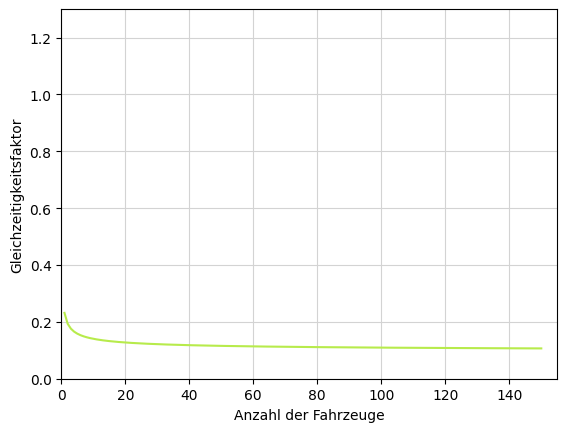

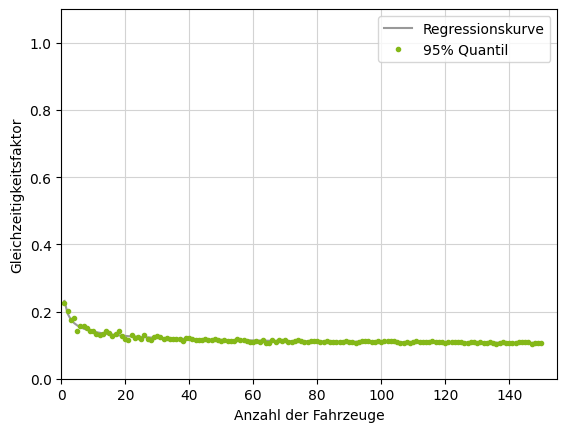

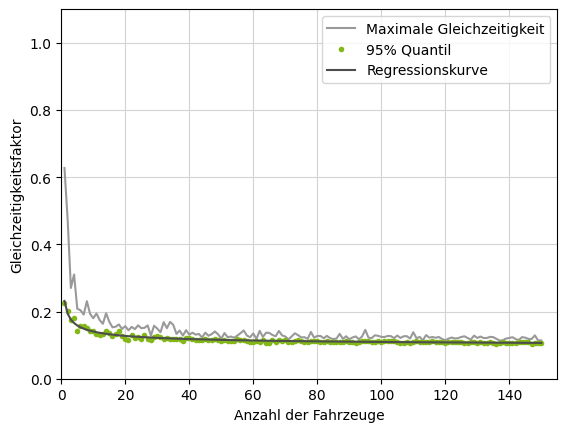

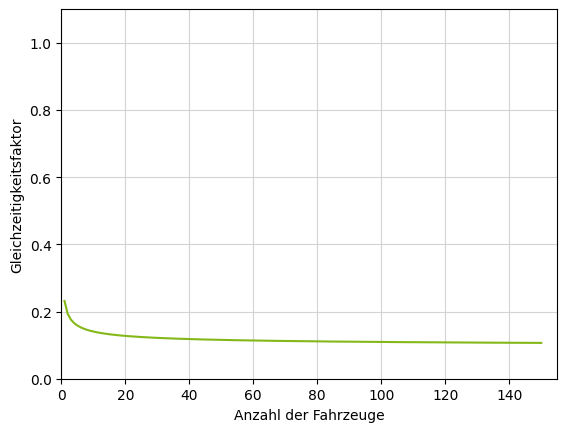

In [5]:
do_all_glg_plots(x,y,sim_curve,quantile_95_tot)

ImportError: cannot import name 'getCasesFromConditions' from 'pypsdm.analysis.concurrency' (C:\Users\smdafeis\PycharmProjects\pypsdm\pypsdm\analysis\concurrency.py)